# **Data Analysis of Amazon Top 50 Bestselling Books**


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("bestsellers with categories.csv")

data.head() #Gives the Content on CSV File. 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
#data.info()

### **Features of DataSet**

1.   Name : Name of The Book - String
2.   Author : Author Of the Book - String
3.   User Rating : Rating Of the Book on Amazon - Float
4.   Reviews : No. Of Reviews for the book - Float
5.   Price : Cost of the Book - Float (as of 13-10-2020)
6.   Year : Year(s) which is ranked the BestSeller - Date
7.   Genre :  Whether its Fiction or Non-Fiction - String

In [5]:
data.columns  # In the output we see the Index Names are perfect wrt working.

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
data.shape   #Shape of your DataSet in form of - (Row, Column)

(550, 7)

In [11]:
data.describe()  #This is used to give the "5 - POINT SUMMARY" alongwith count,mean and std.deviation.

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
data.info() #Gives the Idea of what type of Datas are in there with this DataSet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [12]:
data.isnull().any() #used to check whether data has null value in ANY of the column(s) or row(s)->if no null value (means) False

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [13]:
data.isnull().sum() #Aggregation Func. to get the TOTAL AMT. of missing datas (i.e. null) in the dataset

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

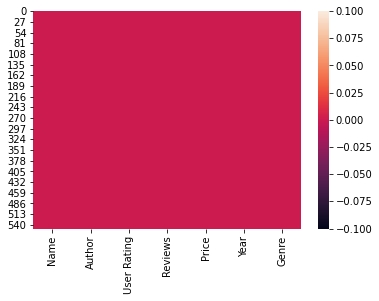

In [15]:
sns.heatmap(data.isnull())      #Shows the correlation between columns of the dataset, A heat map uses a warm-to-cool color spectrum to show you which parts,
plt.show()                      #or columns has the most null values, and as of here since no columns are having null values the coolor is constant.  

In [16]:
data.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

#  **Outlier Detection and Treatment**
Outlier detection is used to detect the Outliers(extreme values) that deviate from other observations in the dataset, they may indicate variability in a measurement or novelty.

### Boxplots
Are a great way to detect outliers. Once outliers are detected  --- 
they can be imputed with 5th and 95th percentile.They use the "5 Point Summary of the column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


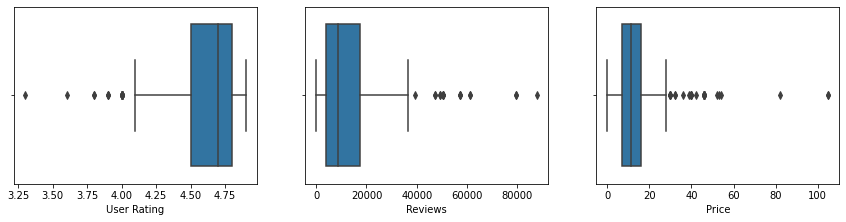

In [18]:
plt.figure(figsize=(20,15))   #figsize attribute of figure() gives the dimensions of the figure to be plotted.

#Subplot is used to plot multiple plots in the same space.

plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

As we see that all the columns (i.e. User Rating, Reviews, Price) of our Data has certain outliers on them, which will be replaced with the 5th and 95th percentiles of their column. 

# **Numpy.clip()** 
is a function used to clip(limit) the values in an array.

Syntax: numpy.clip(a,a_min,a_max,out=None)

Parameters:
a: Array containing elements to clip.
a_min : minimum value
----->If None, cliping is not performed on the lower interval edge. Not more than one of a_min and a_max may be None.
a_max : maximum value


### **Removing the Outliers**

In [19]:
data['Price'] = data['Price'].clip(lower=data['Price'].quantile(0.05), upper = data['Price'].quantile(0.95))

In [20]:
data['User Rating'] = data['User Rating'].clip(lower=data['User Rating'].quantile(0.05), upper = data['User Rating'].quantile(0.95))

In [21]:
data['Reviews'] = data['Reviews'].clip(lower=data['Reviews'].quantile(0.05), upper = data['Reviews'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


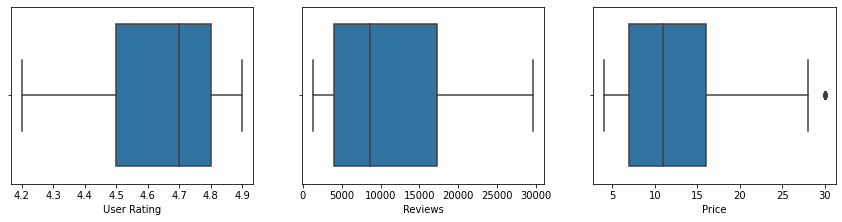

In [22]:
#Looking at Boxplots, to check for outliers. 

plt.figure(figsize=(20,15))   #figsize attribute of figure() gives the dimensions of the figure to be plotted.

#Subplot is used to plot multiple plots in the same space.

plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

# RESULT >> Outliers removed by the use of Numpy Clip()

# **Exlporing trend over year for each genre**

Number of best selling books in each genre each year:

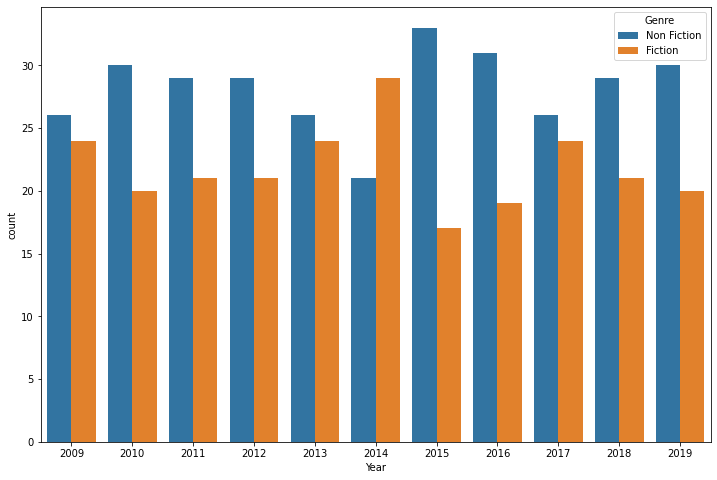

In [26]:
plt.figure(figsize =(12,8))
sns.countplot(x='Year',data=data,hue = 'Genre') #Countplot is same as barplot with spaces b/w the x points

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    float64
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB
